[Py Torch Tutorials 1.71](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)を参考に、Kaggleデータに対してNNを実装してスコアを向上させたい。

## ライブラリのインポート

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

## データの読み込み

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


## 前処理

In [5]:
# 正規化
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

train_normarized = mean_norm(train.iloc[:,1:-1])

In [6]:
# tensor化
n = 250000

train_X = torch.tensor(train_normarized.iloc[:n,].values).float()             # size = (n, 14)
train_t = torch.tensor(train.iloc[:n, -1].values.reshape(-1,1)).float()       # size = (n, 1)
print(train_X.size(), train_t.size())

valid_X = torch.tensor(train_normarized.iloc[n:n+1000,].values).float()        # size = (100, 14)
valid_t = torch.tensor(train.iloc[n:n+1000, -1].values.reshape(-1,1)).float()  # size = (100, 1)
print(valid_X.size(), valid_t.size())

torch.Size([250000, 14]) torch.Size([250000, 1])
torch.Size([1000, 14]) torch.Size([1000, 1])


データ型については[こちら](https://qiita.com/hiro22/items/8238d1445de4c7472c21)を参照

## ネットワークの定義





- 学習率パラメータ (lr,momentum, weight_decay)
- 中間層の数

とかを色々変えて実験したい。

In [7]:
class Net2(nn.Module):
    
    def __init__(self):
        super(Net2,self).__init__()
        
        self.fc1 = nn.Linear(14, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 96)
        self.fc4 = nn.Linear(96, 128)
        self.fc5 = nn.Linear(128, 192)
        self.fc6 = nn.Linear(192, 128)
        self.fc7 = nn.Linear(128, 96)
        self.fc8 = nn.Linear(96, 64)
        self.fc9 = nn.Linear(64, 32)
        self.fc10 = nn.Linear(32, 1)
        
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = self.fc10(x)
        
        return(x)

## 学習

一度に何万epochも訓練させてしまうとターミナルが落ちてしまうので4000epoch訓練してターミナルを再起動する、というのを繰り返すことにした。

In [ ]:
import torch.optim as optim

# 最初のモデル定義
# net2 = Net2()
# optimizer = optim.SGD(net2.parameters(), lr = 0.01, weight_decay = 1e-7)
# criterion = nn.MSELoss()
# train_loss_list = []
# valid_loss_list = []

# 学習途中のモデルをロード
checkpoint = torch.load('net2.tar')
net2 = Net2()
net2.load_state_dict(checkpoint['net2_state_dict'])
optimizer = optim.SGD(net2.parameters(), lr = 0.01, weight_decay = 1e-7)
criterion = nn.MSELoss()
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
num_epoch = checkpoint['num_epoch']
train_loss_list = checkpoint['train_loss_list']
valid_loss_list = checkpoint['valid_loss_list']


for epoch in range(num_epoch, num_epoch + 4000):
    
    # train
    running_loss = 0.0
    net2.train()
    optimizer.zero_grad()
    y = net2(train_X)
    loss = criterion(y,train_t)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if epoch % 100 == 99:
        print('train epoch: ', epoch + 1, 'loss: ', running_loss)
    train_loss_list.append(running_loss)
    running_loss = 0.0

    # valid
    running_loss = 0.0
    net2.eval()
    with torch.no_grad():
        y = net2(valid_X)
        loss = criterion(y, valid_t)
        running_loss += loss.item()
        if epoch % 100 == 99:
            print('valid epoch: ', epoch + 1, 'loss: ', running_loss)
        valid_loss_list.append(running_loss)
        running_loss = 0.0

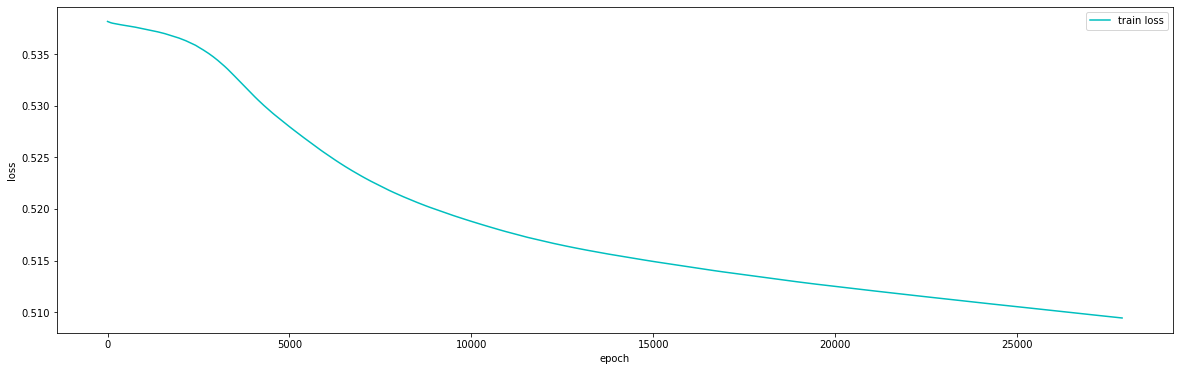

In [11]:
plt.figure(figsize = (20,6))
plt.plot(train_loss_list[30:], color = 'c', label = 'train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.show()

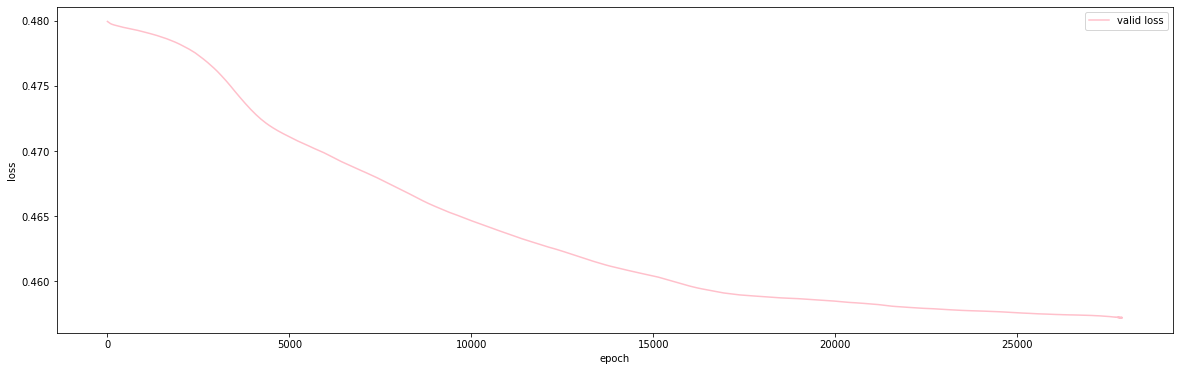

In [12]:
plt.figure(figsize = (20,6))
plt.plot(valid_loss_list[30:], color = 'pink', label = 'valid loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.show()

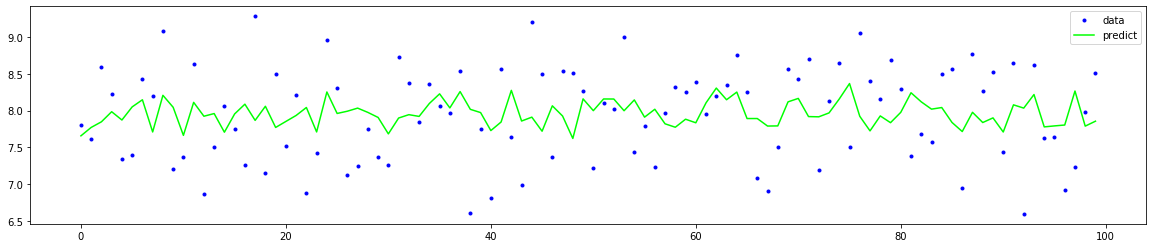

In [13]:
net2.eval()
with torch.no_grad():
    y = net2(valid_X)
    
plt.figure(figsize = (20,4))
plt.plot(valid_t.detach().numpy().ravel()[:100], 
         marker = '.', linestyle = 'None', color = 'blue', label = 'data')
plt.plot(y.detach().numpy().ravel()[:100], linestyle = '-', color = 'lime', label = 'predict')
plt.legend(loc = 'upper right')
plt.show()

## モデルの保存

In [ ]:
num_epoch = num_epoch + 4000
torch.save(
    {
        'num_epoch': num_epoch,
        'net2_state_dict': net2.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_loss_list': train_loss_list,
        'valid_loss_list': valid_loss_list
    },
    'net2.tar',
)


# モデル、リストのロードは以下の通り
# checkpoint = torch.loat('net.tar')
# net = Net()
# optimizer = optim.SGD(net.parameters(), lr = 0.01)
# net.load_state_dict(checkpoint['net_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# num_epoch = checkpoint['num_epoch']
# train_loss_list = checkpoint['train_loss_list']
# valid_loss_list = checkpoint['valid_loss_list']

## 提出

In [14]:
test_normarized = mean_norm(test.iloc[:,1:])
test_X = torch.tensor(test_normarized.values).float()

net2.eval()
with torch.no_grad():
    prediction = net2(test_X)
pd.DataFrame(pd.Series(prediction.detach().numpy().ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,200000.0,7.946541,0.167063,7.449384,7.829603,7.930991,8.048897,9.037469


In [15]:
submission3 = pd.DataFrame({'id': test['id'], 'target': prediction.detach().numpy().ravel()})
submission3.head()

,id,target
0,0,8.098774
1,2,7.784081
2,6,8.089811
3,7,8.158569
4,10,8.261795


In [16]:
submission3.tail()

,id,target
199995,499984,8.236614
199996,499985,8.016239
199997,499987,8.102966
199998,499988,8.056181
199999,499990,7.924012


In [17]:
submission3.to_csv("submission3.csv", index = False)

- net: 隠れ層2、lr = 0.1、epoch = 100、score = 0.72665
- net2: 隠れ層8、lr = 0.01、epoch = 30000、score = 0.71655